In [ ]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html


In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.optim import SGD, RMSprop, Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


#константы
b_size_const = 64
learn_rate_const = 1E-3
epohs_const = 50

In [1]:

def get_dataloaders(b_size_const):
    training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
    test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())
    train_loader = DataLoader(training_data, b_size_const=b_size_const)
    test_loader = DataLoader(test_data, b_size_const=b_size_const)
    return train_loader, test_loader

train_dataloader, test_dataloader = get_dataloaders(b_size_const)



# Определение модели
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.linear_relu_stack(x)

# обучение на одной эпохе
def train_one_epoch(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0

    for X, y in dataloader:
        pred = model(X)
        
        
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    
    print(f"Training Loss: {avg_loss:.4f}")
    return avg_loss

#  тесты
def evaluate(dataloader, model, loss_fn):
    
    model.eval()
    total_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            
            
            pred = model(X)
            total_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).sum().item()

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / len(dataloader.dataset)
    
    print(f"Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2%}")
    return avg_loss, accuracy





# Функция для запуска обучения с разными оптимизаторами
def run_experiment(optimizer_type, epohs_const, train_dataloader, test_dataloader):
    
    
    model = NeuralNetwork()
    optimizer = optimizer_type(model.parameters(), lr=learn_rate_const)
    loss_fn = nn.CrossEntropyLoss()
    train_losses, test_losses = [], []

    for epoch in range(epohs_const):
        
        print(f"\nEpoch {epoch + 1}/{epohs_const} for {optimizer_type.__name__}")
        
        train_loss = train_one_epoch(train_dataloader, model, loss_fn, optimizer)
        test_loss, accuracy = evaluate(test_dataloader, model, loss_fn)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

    return train_losses, test_losses

# Запуск эксперимента для каждого оптимизатора
optimizers = {"SGD": SGD, "RMSprop": RMSprop, "Adam": Adam}

results = {}

for opt_name, opt_class in optimizers.items():
    
    
    print(f"\nTraining with {opt_name} optimizer")
    
    train_losses, test_losses = run_experiment(opt_class, epohs_const, train_dataloader, test_dataloader)
    results[opt_name] = {"train_losses": train_losses, "test_losses": test_losses}





Training with SGD optimizer

Epoch 1/50 for SGD
Training Loss: 2.2306
Test Loss: 2.1470, Accuracy: 44.28%

Epoch 2/50 for SGD
Training Loss: 2.0131
Test Loss: 1.8521, Accuracy: 53.09%

Epoch 3/50 for SGD
Training Loss: 1.6654
Test Loss: 1.4959, Accuracy: 59.71%

Epoch 4/50 for SGD
Training Loss: 1.3573
Test Loss: 1.2482, Accuracy: 62.44%

Epoch 5/50 for SGD
Training Loss: 1.1574
Test Loss: 1.0926, Accuracy: 64.24%

Epoch 6/50 for SGD
Training Loss: 1.0287
Test Loss: 0.9899, Accuracy: 65.40%

Epoch 7/50 for SGD
Training Loss: 0.9412
Test Loss: 0.9180, Accuracy: 66.82%

Epoch 8/50 for SGD
Training Loss: 0.8781
Test Loss: 0.8649, Accuracy: 68.08%

Epoch 9/50 for SGD
Training Loss: 0.8304
Test Loss: 0.8239, Accuracy: 69.32%

Epoch 10/50 for SGD
Training Loss: 0.7928
Test Loss: 0.7911, Accuracy: 70.83%

Epoch 11/50 for SGD
Training Loss: 0.7622
Test Loss: 0.7639, Accuracy: 72.16%

Epoch 12/50 for SGD
Training Loss: 0.7365
Test Loss: 0.7406, Accuracy: 73.31%

Epoch 13/50 for SGD
Training Lo

Training Loss: 0.4881
Test Loss: 0.4150, Accuracy: 84.90%

Epoch 2/50 for Adam
Training Loss: 0.3602
Test Loss: 0.3978, Accuracy: 85.01%

Epoch 3/50 for Adam
Training Loss: 0.3192
Test Loss: 0.3831, Accuracy: 85.91%

Epoch 4/50 for Adam
Training Loss: 0.2927
Test Loss: 0.3654, Accuracy: 86.53%

Epoch 5/50 for Adam
Training Loss: 0.2723
Test Loss: 0.3484, Accuracy: 87.25%

Epoch 6/50 for Adam
Training Loss: 0.2565
Test Loss: 0.3562, Accuracy: 87.07%

Epoch 7/50 for Adam
Training Loss: 0.2408
Test Loss: 0.3551, Accuracy: 87.24%

Epoch 8/50 for Adam
Training Loss: 0.2283
Test Loss: 0.3463, Accuracy: 87.59%

Epoch 9/50 for Adam
Training Loss: 0.2129
Test Loss: 0.3531, Accuracy: 87.99%

Epoch 10/50 for Adam
Training Loss: 0.2045
Test Loss: 0.3827, Accuracy: 87.64%

Epoch 11/50 for Adam
Training Loss: 0.1941
Test Loss: 0.3883, Accuracy: 87.50%

Epoch 12/50 for Adam
Training Loss: 0.1823
Test Loss: 0.3764, Accuracy: 88.11%

Epoch 13/50 for Adam
Training Loss: 0.1748
Test Loss: 0.4175, Accurac

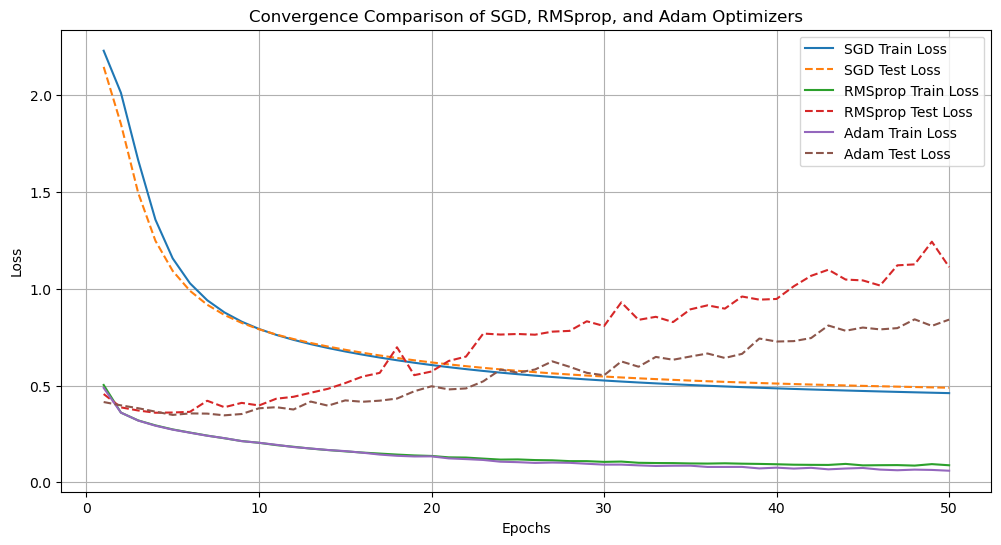

In [2]:
# Построение графиков
plt.figure(figsize=(12, 6))
for opt_name, losses in results.items():
    
    plt.plot(range(1, epohs_const + 1), losses["train_losses"], label=f"{opt_name} Train Loss")
    plt.plot(range(1, epohs_const + 1), losses["test_losses"], linestyle="--", label=f"{opt_name} Test Loss")

plt.xlabel('epohs_const')
plt.ylabel('Loss')
plt.title('Convergence Comparison of SGD, RMSprop, and Adam Optimizers')
plt.grid(True)
plt.legend()
plt.show()

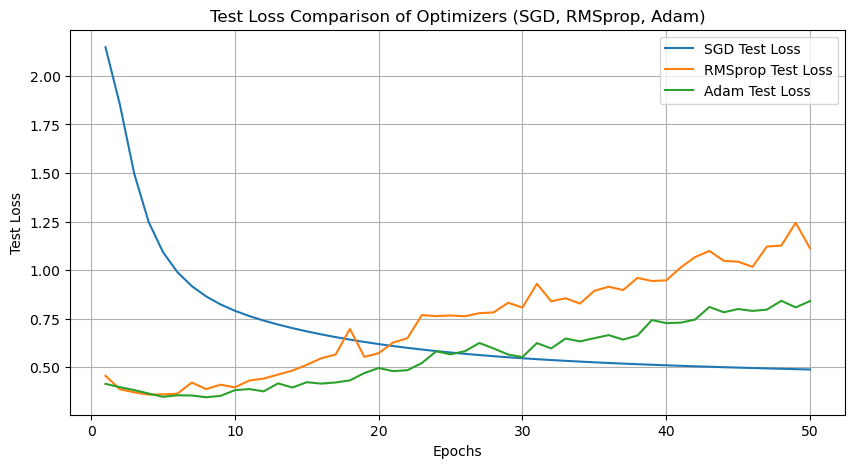

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for opt_name, losses in results.items():
    plt.plot(range(1, epohs_const + 1), losses["test_losses"], label=f"{opt_name} Test Loss")

plt.xlabel('epohs_const')
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison of Optimizers (SGD, RMSprop, Adam)')
plt.grid(True)
plt.legend()

# Показать график
plt.show()


Выводы

SGD начинает обучение с резким снижением ошибки на первых эпохах. Однако после этого его сходимость замедляется, и ошибка может колебаться или не уменьшаться эффективно.

RMSprop и Adam могут показывать более быстрые и стабильные результаты, поскольку используют адаптивные скорости
обучения для различных параметров.

Adam часто показывает наилучшие результаты, поскольку он сочетает адаптивные методы с моментом,
что ускоряет сходимость и делает обучение более стабильным.